### Загрузка всех необходимых библиотек

In [1]:
#Загрузим все необходимые библиотеки и модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# , category=FutureWarning

В качестве данных воспользуемся заранее подготовленными данными

### 1 Описание данных

In [2]:
### Загрузка данных
first_df = pd.read_csv('usersinfo_tpu2807.csv', sep=',')

# Уберем столбцы Unnamed: 0 и id, can_access_closed, is_closed, first_name, last_name

first_df = first_df.drop(['Unnamed: 0',
                          'id', 
                          'can_access_closed', 
                          'is_closed', 
                          'first_name', 
                          'last_name'], axis=1)

# Где возможно в датасете преобразуем год рождения в дату
first_df['bdate'] = pd.to_datetime(first_df['bdate'], errors='coerce')

# Делаем копию датафрейма с которой будем работать
df = first_df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   city              646 non-null    object        
 1   followers_count   768 non-null    int64         
 2   sex               768 non-null    int64         
 3   bdate             440 non-null    datetime64[ns]
 4   interests         47 non-null     object        
 5   university        413 non-null    float64       
 6   university_name   410 non-null    object        
 7   faculty           413 non-null    float64       
 8   faculty_name      408 non-null    object        
 9   graduation        413 non-null    float64       
 10  education_form    317 non-null    object        
 11  education_status  314 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 72.1+ KB


In [3]:
df.head(5)

,city,followers_count,sex,bdate,interests,university,university_name,faculty,faculty_name,graduation,education_form,education_status
0,"{'id': 2, 'title': 'Санкт-Петербург'}",47,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'id': 1, 'title': 'Москва'}",221,1,1989-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'id': 61, 'title': 'Калининград'}",1744,1,1988-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'id': 60, 'title': 'Казань'}",1036,1,NaT,"Математика, программирование, виниловые пласти...",527.0,КФУ (бывш. КГУ им. Ульянова-Ленина),2263268.0,Механико-математический факультет,0.0,Очное отделение,Выпускница (специалист)
4,"{'id': 1054308, 'title': 'Домодедово'}",690,1,1991-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Как видим из данных столбец city имеет формат str 
# Данные столбца city выглядят в неудобном для чтения формате
# Создадим функцию для выявления города и применим ее к столбцу city
def city(x):
    for i in x:
        if x == 'nan':
            continue
        else:
            y = eval(x)['title']
            return y

In [5]:
df['city']=df['city'].astype('str')

In [161]:
type(df['city'][769])

str

In [6]:
# применим функцию к столбцу city
df['city']= df['city'].apply(lambda x: city(x))

In [7]:
df.head(5)

,city,followers_count,sex,bdate,interests,university,university_name,faculty,faculty_name,graduation,education_form,education_status
0,Санкт-Петербург,47,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Москва,221,1,1989-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Калининград,1744,1,1988-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Казань,1036,1,NaT,"Математика, программирование, виниловые пласти...",527.0,КФУ (бывш. КГУ им. Ульянова-Ленина),2263268.0,Механико-математический факультет,0.0,Очное отделение,Выпускница (специалист)
4,Домодедово,690,1,1991-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Пропущенные данные заменим 0
df = df.fillna(0)
df = df.replace({'None' : 0})

In [12]:
df

,city,followers_count,sex,bdate,interests,university,university_name,faculty,faculty_name,graduation,education_form,education_status
0,Санкт-Петербург,47,Мужской,0,0,0.0,0,0.0,0,0.0,0,0
1,Москва,221,Женский,1989-10-08 00:00:00,0,0.0,0,0.0,0,0.0,0,0
2,Калининград,1744,Женский,1988-07-29 00:00:00,0,0.0,0,0.0,0,0.0,0,0
3,Казань,1036,Женский,0,"Математика, программирование, виниловые пласти...",527.0,КФУ (бывш. КГУ им. Ульянова-Ленина),2263268.0,Механико-математический факультет,0.0,Очное отделение,Выпускница (специалист)
4,Домодедово,690,Женский,1991-01-28 00:00:00,0,0.0,0,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,Мужской,1998-02-15 00:00:00,0,2.0,МГУ,23.0,Факультет вычислительной математики и кибернетики,2017.0,Очное отделение,Выпускник (бакалавр)
764,0,4,Мужской,0,0,853.0,ТПУ,132196.0,Инженерная школа ядерных технологий,2019.0,Очное отделение,Студент (бакалавр)
765,Казань,2,Мужской,1992-11-16 00:00:00,0,527.0,КФУ (бывш. КГУ им. Ульянова-Ленина),2886.0,Институт вычислительной математики и информаци...,2014.0,Очное отделение,0
766,0,17,Женский,1989-09-13 00:00:00,0,338.0,РУДН,1513.0,Факультет физико-математических и естественных...,2012.0,Очное отделение,Выпускница (бакалавр)


In [9]:
df['sex'] = df['sex'].replace({1 : 'Женский', 2 :'Мужской'})


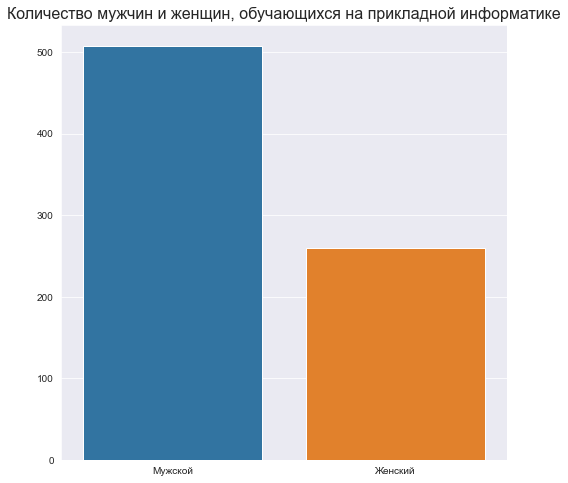

In [13]:
# График распределения по полу
sns.set_style('darkgrid')
sexm = df['sex'].value_counts()

plt.figure(figsize=(8,8))
plt.title("Количество мужчин и женщин, обучающихся на прикладной информатике", fontsize=16)
sns.barplot(y=sexm.values, x=sexm.index)
plt.show()

Text(0, 0.5, 'Записей')

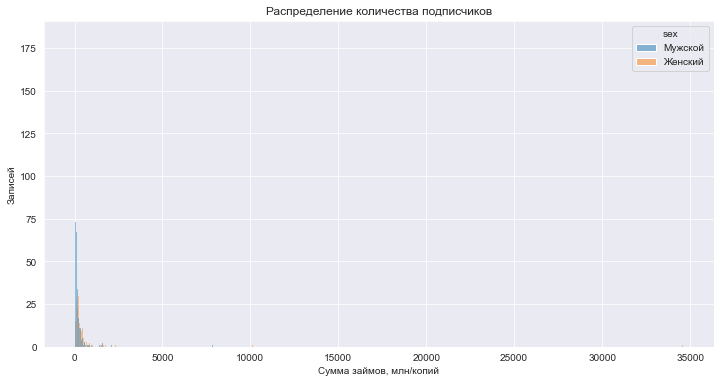

In [14]:
# Построим гистограмму по количеству подписчиков
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.histplot(data=df, x='followers_count', hue='sex', alpha=0.5)
ax.set_title('Распределение количества подписчиков')
ax.set_xlabel('Число подписичков')
ax.set_ylabel('Записей')

<AxesSubplot:title={'center':'Распределение количества подписчиков'}, xlabel='followers_count', ylabel='Count'>

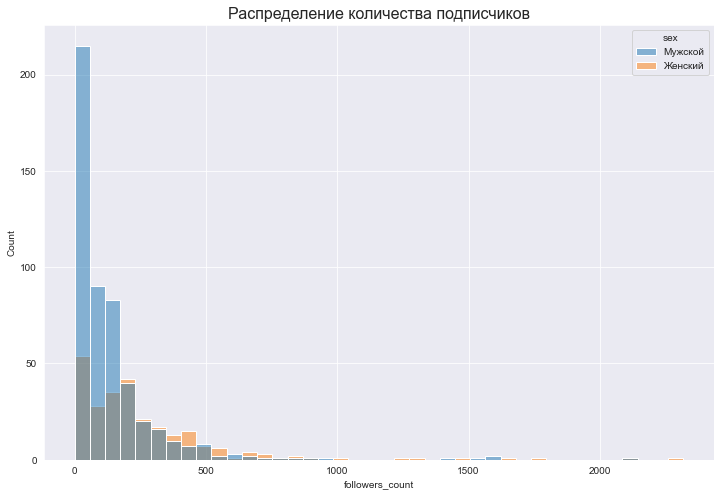

In [95]:
#Почистим данные от выбросов
# Наблюдаемое отклонение от среднего
dev = (df['followers_count']-df['followers_count'].mean()).abs()
# Стандартное отклонение
std = df['followers_count'].std()
# Фильтруем исходный набор данных
df_followers = df[~(dev>3*std)]

plt.figure(figsize=(12,8))
plt.title("Распределение количества подписчиков", fontsize=16)
sns.histplot(data=df_followers, x='followers_count', hue='sex', alpha=0.5, bins=40)



In [21]:
df['city'].unique()

array(['Санкт-Петербург', 'Москва', 'Калининград', 'Казань', 'Домодедово',
       'Нижний Новгород', 0, 'Томск', 'Набережные Челны', 'Antalya',
       'Всеволожск', 'Улан-Удэ', 'Berlin', 'Одинцово', 'Уфа', 'Zürich',
       'Мытищи', 'Самара', 'Melbourne', 'Ростов-на-Дону', 'Новосибирск',
       'Сергиев Посад', 'Оренбург', 'Балашиха', 'Dubai', 'Тбилиси',
       'Павлодар', 'Madison', 'Тольятти', 'Заволжье', 'Горловка', 'Бор',
       'Сочи', 'Beograd', 'Тирасполь', 'Саров', 'Ярославль',
       'Вознесенское', 'Витебск', 'Кстово', 'Майкоп', 'Долгопрудный',
       'Бавлы', 'Химки', 'Дзержинск', 'Балаково', 'Харьков', 'Кишинев',
       'Муром', 'Amsterdam', 'Kyōto', 'Гатчина', 'Королёв',
       'Новомосковск', 'Ереван', 'Бийск', 'Алматы', 'Воронеж', 'Белово',
       'Тверь', 'Люберцы', 'Междуреченск', 'Владимир', 'Bonn', 'Терек',
       'Йошкар-Ола', 'Якутск', 'Стерлитамак', 'Екатеринбург', 'Полоцк',
       'Караганда', 'Ulaanbaatar', 'München', 'Miami',
       'Каменск-Шахтинский', 'Тула'

In [68]:
# Сгруппируем данные по количеству студентов в городах
df_city=df.groupby('city', as_index=False).agg({'sex':'count'}).sort_values('sex', ascending=False)
df_city = df_city[df_city['city'] != 0]
df_city = df_city.head(10)
df_city

,city,sex
66,Москва,217
71,Нижний Новгород,75
53,Казань,73
82,Санкт-Петербург,63
93,Томск,34
80,Ростов-на-Дону,23
81,Самара,19
98,Уфа,13
76,Оренбург,8
102,Ярославль,8


<AxesSubplot:xlabel='sex', ylabel='city'>

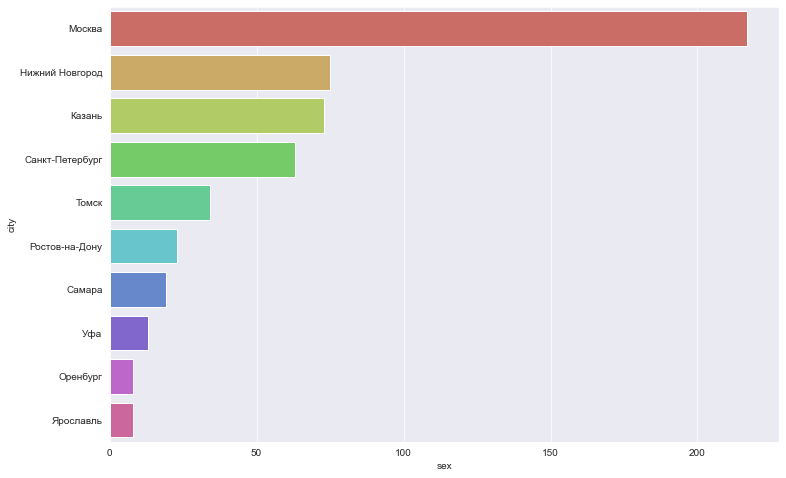

In [26]:
# График распределения студентов по городам
plt.figure(figsize=(12,8))
sns.barplot(y='city', x= 'sex', palette = 'hls', data= df_city)
plt.title("Распределение студентов по городам", fontsize=16)
#plt.grid()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


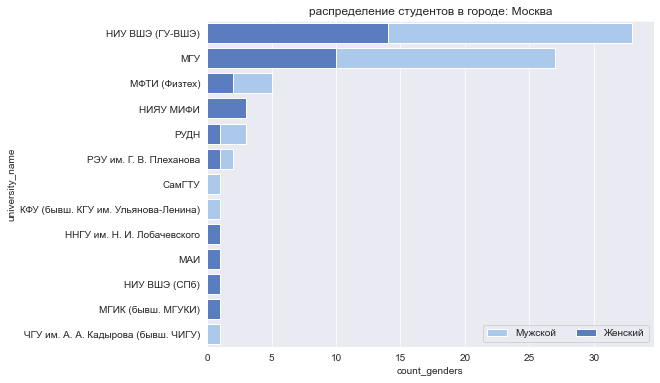

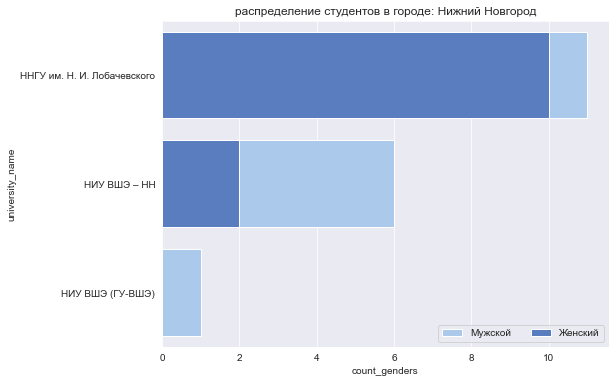

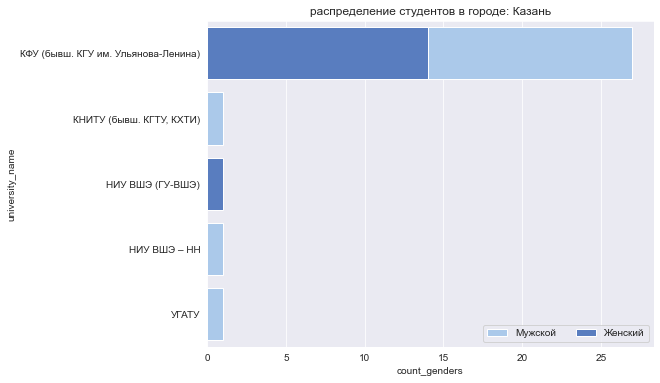

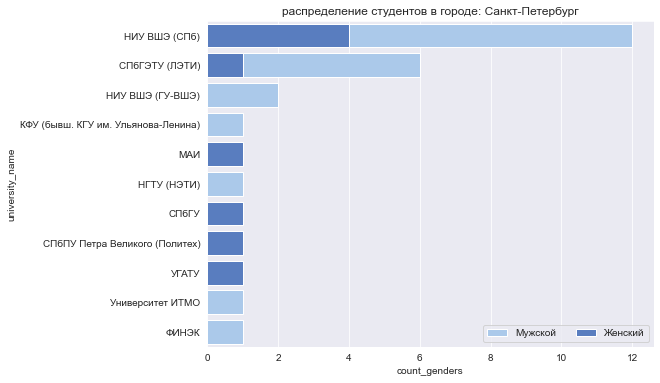

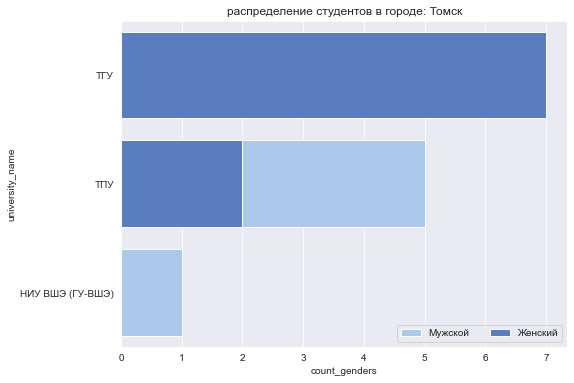

In [248]:
# Проанализируем топ вузов по городам
df_university = df[df['university_name'] !=0]
city_list = df_city.head(5)['city']
for i, name in enumerate(city_list):
    sns.set_color_codes('pastel')
    plt.figure(figsize=(8,6))
    ax = axs[i]
    data = df_university[df_university['city'] == name].groupby(['university_name', 'sex'], as_index=False).agg('count')
    data['count_genders'] = data['university']
    data = data[['university_name', 'sex','count_genders']].sort_values(by='count_genders', ascending=False)
#x = data[data['sex'] == 'Мужской']['count_genders']
    sns.set_color_codes('pastel')
    sns.barplot(y='university_name', x= data[data['sex'] == 'Мужской']['count_genders'], data=data, label='Мужской', color='b' )
    sns.set_color_codes("muted")
    sns.barplot(y='university_name', x= data[data['sex'] == 'Женский']['count_genders'], data=data, label='Женский', color='b' )
    plt.legend(ncol=2, loc="lower right", frameon=True)
    plt.title('распределение студентов в городе: '+ name)
    

In [28]:
df_sex=df.groupby(['sex', 'city'], as_index=False).agg({'bdate':'count'}).sort_values('bdate', ascending=False)
df_sex = df_sex.rename(columns = {'bdate' : 'sex_count'})
df_sex = df_sex[df_sex['city'] != 0]
series_city = df_city['city'] # серия городов
df_sex

,sex,city,sex_count
95,Мужской,Москва,150
26,Женский,Москва,67
85,Мужской,Казань,47
109,Мужской,Санкт-Петербург,45
100,Мужской,Нижний Новгород,44
...,...,...,...
53,Мужской,Luoyang,1
52,Мужской,Kraków,1
51,Мужской,Dubai,1
50,Мужской,Bonn,1


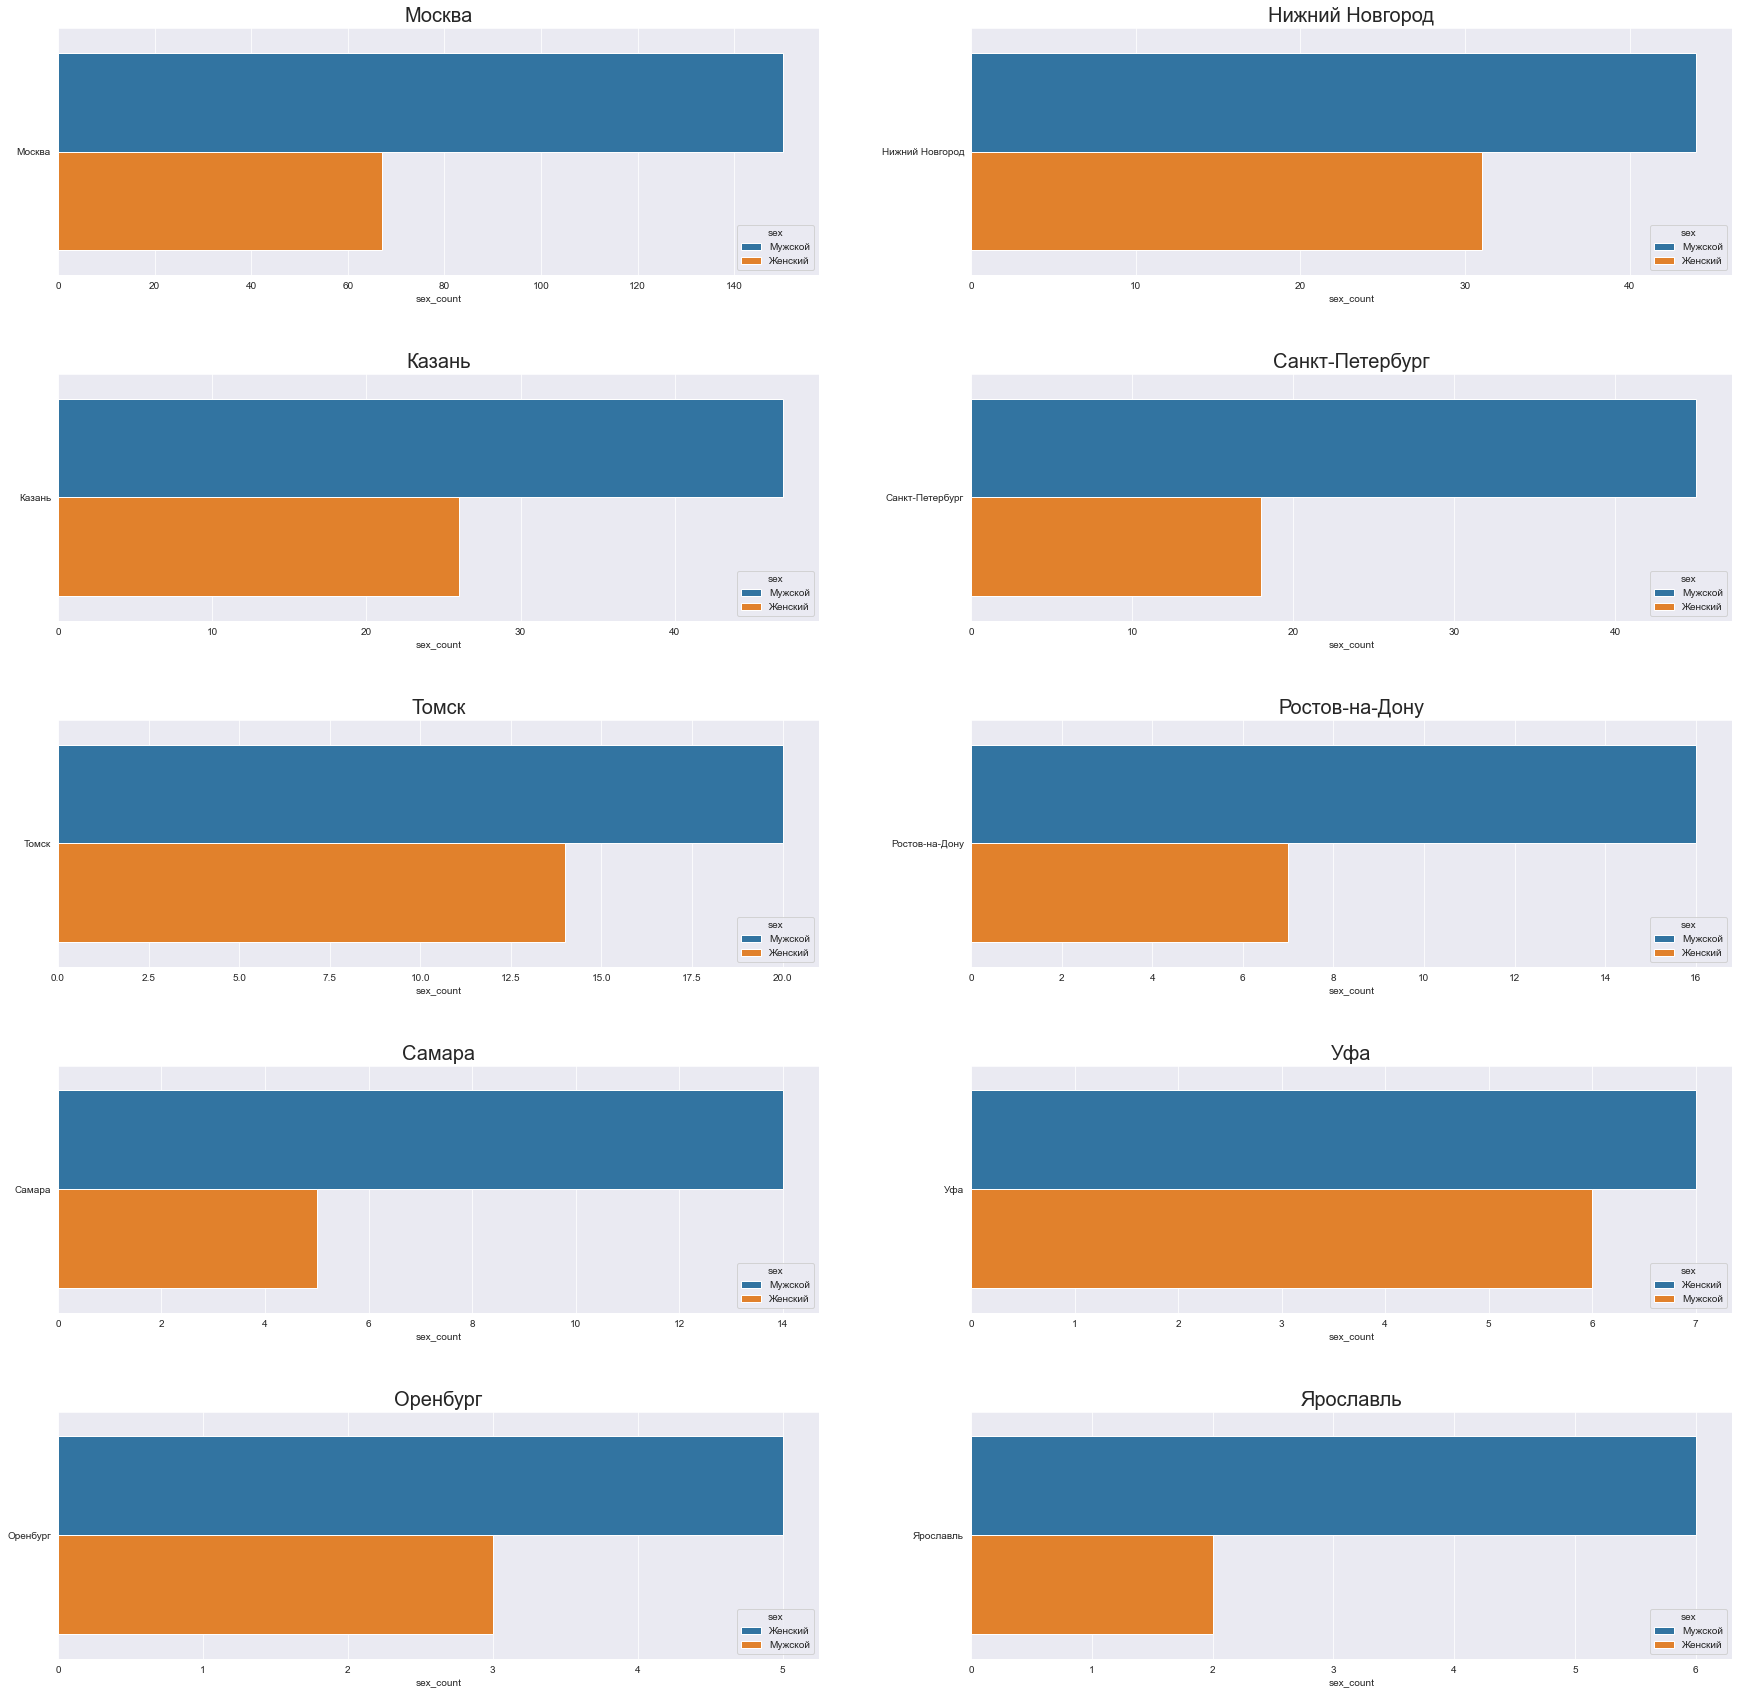

In [29]:
# строим график распределения мужчин и женщин по городам
fig,axes = plt.subplots(5,2, sharex=False, squeeze=False, figsize=(30,30))
for ax,q in zip(axes.ravel(), series_city):
    tmp_df = df_sex[df_sex['city'].eq(q)]
    ax.set_title(q, fontsize=20)  
    ax.yaxis.label.set_visible(False)
    fig.subplots_adjust(hspace=0.4)
   
    
    sns.barplot(y='city', x= 'sex_count', hue ='sex', ax=ax, data=tmp_df )

In [30]:
df['education_status'].unique()

array([0, 'Выпускница (специалист)', 'Выпускник (специалист)',
       'Выпускница (бакалавр)', 'Студентка (специалист)',
       'Выпускник (бакалавр)', 'Студент (специалист)',
       'Студент (бакалавр)', 'Студент (магистр)', 'Студентка (бакалавр)',
       'Кандидат наук', 'Студентка (магистр)', 'Выпускник (магистр)',
       'Выпускница (магистр)', 'Абитуриент', 'Докторант', 'Адъюнкт',
       'Абитуриентка', 'Аспирант', 'Доктор наук', 'Интерн'], dtype=object)

In [31]:
df.head(5)

,city,followers_count,sex,bdate,interests,university,university_name,faculty,faculty_name,graduation,education_form,education_status
0,Санкт-Петербург,47,Мужской,0,0,0.0,0,0.0,0,0.0,0,0
1,Москва,221,Женский,1989-10-08 00:00:00,0,0.0,0,0.0,0,0.0,0,0
2,Калининград,1744,Женский,1988-07-29 00:00:00,0,0.0,0,0.0,0,0.0,0,0
3,Казань,1036,Женский,0,"Математика, программирование, виниловые пласти...",527.0,КФУ (бывш. КГУ им. Ульянова-Ленина),2263268.0,Механико-математический факультет,0.0,Очное отделение,Выпускница (специалист)
4,Домодедово,690,Женский,1991-01-28 00:00:00,0,0.0,0,0.0,0,0.0,0,0


In [32]:
df1 = df.copy()

In [33]:
# переименуем столбец education_status соглсано словарю key education
# создадим файл ключей чтобы преобразовать данные по научной степени к одному виду
mapping = {'0'  : 0,
"Выпускница (специалист)" : "специалист",
"Выпускник (специалист)" : "специалист",
"Выпускница (бакалавр)" : "бакалавр",
"Студентка (специалист)" : "специалист",
"Выпускник (бакалавр)" : "бакалавр",
"Студент (специалист)" : "специалист",
"Студент (бакалавр)" : "бакалавр",
"Студент (магистр)" : "магистр",
"Студентка (бакалавр)" : "бакалавр",
"Кандидат наук" : "кандидат наук",
"Студентка (магистр)" : "магистр",
"Выпускник (магистр)" : "магистр",
"Выпускница (магистр)" : "магистр",
"Абитуриент" : "абитуриент",
"Докторант" : "докторант",
"Адъюнкт" : "адъюнкт",
"Абитуриентка" : "абитуриент",
"Аспирант" : "аспирант",
"Доктор наук" : "доктор наук",
"Интерн" : "интерн"}
df1['education_status']=df1['education_status'].map(mapping)


In [34]:
# Создадим датафрейм при отстутствии пропусков в степени образования
df1 = df1.fillna(0)
df1.head(5)

,city,followers_count,sex,bdate,interests,university,university_name,faculty,faculty_name,graduation,education_form,education_status
0,Санкт-Петербург,47,Мужской,0,0,0.0,0,0.0,0,0.0,0,0
1,Москва,221,Женский,1989-10-08 00:00:00,0,0.0,0,0.0,0,0.0,0,0
2,Калининград,1744,Женский,1988-07-29 00:00:00,0,0.0,0,0.0,0,0.0,0,0
3,Казань,1036,Женский,0,"Математика, программирование, виниловые пласти...",527.0,КФУ (бывш. КГУ им. Ульянова-Ленина),2263268.0,Механико-математический факультет,0.0,Очное отделение,специалист
4,Домодедово,690,Женский,1991-01-28 00:00:00,0,0.0,0,0.0,0,0.0,0,0


In [35]:
df_educ = df1[df1['education_status'] != 0]
df_educ.head(5)

,city,followers_count,sex,bdate,interests,university,university_name,faculty,faculty_name,graduation,education_form,education_status
3,Казань,1036,Женский,0,"Математика, программирование, виниловые пласти...",527.0,КФУ (бывш. КГУ им. Ульянова-Ленина),2263268.0,Механико-математический факультет,0.0,Очное отделение,специалист
5,Москва,191,Мужской,0,0,2.0,МГУ,38.0,Физический факультет,2008.0,Очное отделение,специалист
7,Москва,766,Женский,0,"Литература, мода, биоинформатика",128.0,НИУ ВШЭ (ГУ-ВШЭ),2166855.0,Факультет компьютерных наук,2015.0,Очное отделение,бакалавр
10,Москва,279,Женский,1991-11-23 00:00:00,0,653.0,ННГУ им. Н. И. Лобачевского,2187014.0,"Институт информационных технологий, математики...",2015.0,Очное отделение,бакалавр
12,Томск,148,Женский,0,0,851.0,ТГУ,229103.0,Факультет прикладной математики и кибернетики,2013.0,Очное отделение,специалист


In [36]:
# сделаем две копии для мужчин и женщин чтобы расчитать процентное соотношение
df_es_status = df_educ.groupby(['education_status', 'sex'], as_index = False).agg('count')

df_es_status_men = df_educ.copy()
df_es_status_men = df_es_status_men[df_es_status_men['sex']=='Мужской'] \
.groupby('education_status', as_index=False) \
.agg({'education_form' :'count'})
df_es_status_men['persent_count'] = 100* (df_es_status_men['education_form'] / df_es_status_men['education_form'].sum())
df_es_status_men

,education_status,education_form,persent_count
0,абитуриент,5,2.358491
1,адъюнкт,1,0.471698
2,аспирант,1,0.471698
3,бакалавр,153,72.169811
4,доктор наук,1,0.471698
5,докторант,2,0.943396
6,интерн,1,0.471698
7,магистр,27,12.735849
8,специалист,21,9.905660


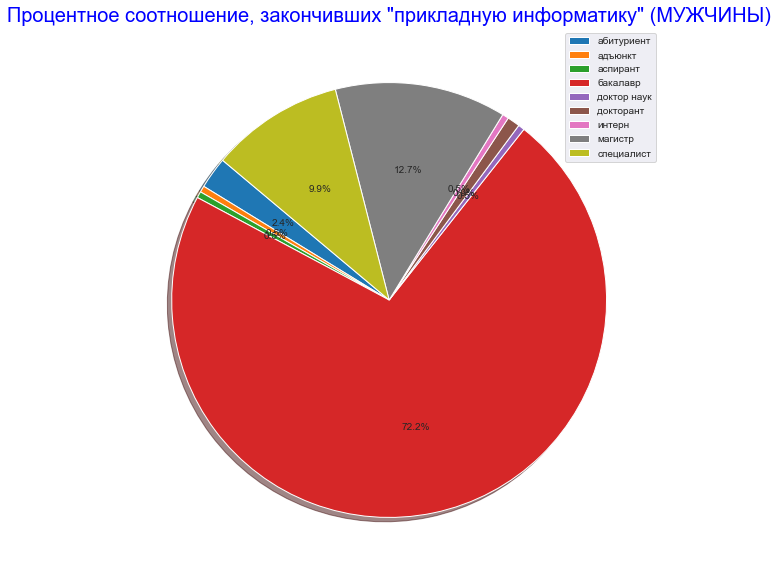

In [37]:
# Диаграмма для мужчин
plt.figure(figsize=(10,10))
data = df_es_status_men['persent_count']
labels = df_es_status_men['education_status']
plt.pie(data, autopct='%1.1f%%',textprops={'fontsize': 10}, shadow=True, startangle=140)
plt.legend(labels=labels)
plt.title('Процентное соотношение, закончивших "прикладную информатику" (МУЖЧИНЫ)', size=20, color='blue')
plt.show()

In [38]:
# То же самое сделаем для женщин
df_es_status_women = df_educ.copy()
df_es_status_women = df_es_status_women[df_es_status_women['sex']=='Женский'] \
.groupby('education_status', as_index=False) \
.agg({'education_form' :'count'})
df_es_status_women['persent_count'] = 100* (df_es_status_women['education_form'] / df_es_status_women['education_form'].sum())
df_es_status_women

,education_status,education_form,persent_count
0,абитуриент,2,1.960784
1,бакалавр,64,62.745098
2,кандидат наук,2,1.960784
3,магистр,14,13.725490
4,специалист,20,19.607843


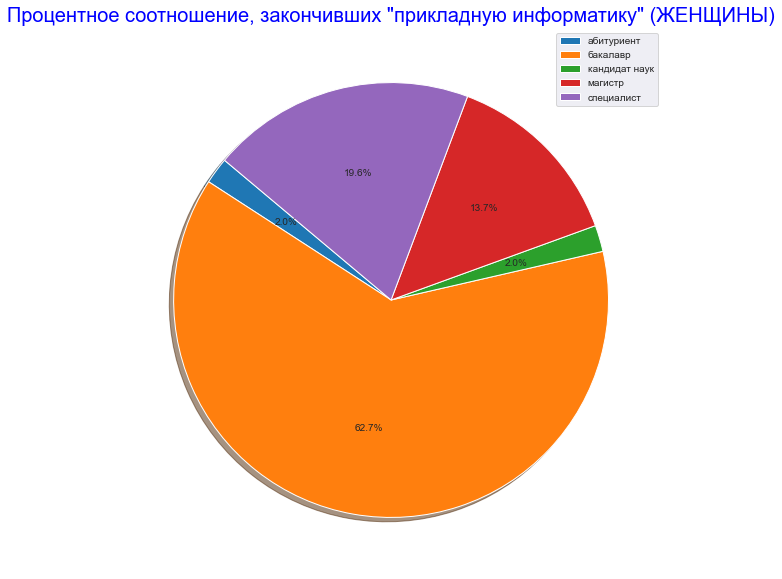

In [39]:
# Диаграмма для женщин
plt.figure(figsize=(10,10))
data = df_es_status_women['persent_count']
labels = df_es_status_women['education_status']
plt.pie(data, autopct='%1.1f%%',textprops={'fontsize': 10}, shadow=True, startangle=140)
plt.legend(labels=labels)
plt.title('Процентное соотношение, закончивших "прикладную информатику" (ЖЕНЩИНЫ)', size=20, color='blue')
plt.show()

In [40]:
# Скопируем датаесет и посмотрим по году выпуска
df_graduate = df_educ.copy()
df_graduate = df_graduate[df_graduate['graduation'] != 0]
df_graduate[]

,city,followers_count,sex,bdate,interests,university,university_name,faculty,faculty_name,graduation,education_form,education_status
5,Москва,191,Мужской,0,0,2.0,МГУ,38.0,Физический факультет,2008.0,Очное отделение,специалист
7,Москва,766,Женский,0,"Литература, мода, биоинформатика",128.0,НИУ ВШЭ (ГУ-ВШЭ),2166855.0,Факультет компьютерных наук,2015.0,Очное отделение,бакалавр
10,Москва,279,Женский,1991-11-23 00:00:00,0,653.0,ННГУ им. Н. И. Лобачевского,2187014.0,"Институт информационных технологий, математики...",2015.0,Очное отделение,бакалавр
12,Томск,148,Женский,0,0,851.0,ТГУ,229103.0,Факультет прикладной математики и кибернетики,2013.0,Очное отделение,специалист
13,Санкт-Петербург,181,Мужской,1993-08-24 00:00:00,"Аниме, фантастика, фэнтези, фильмы, парусный с...",53.0,Университет ИТМО,206.0,Естественно-научный факультет,2018.0,Очное отделение,бакалавр
...,...,...,...,...,...,...,...,...,...,...,...,...
762,Москва,3,Мужской,1996-03-02 00:00:00,0,297.0,МФТИ (Физтех),2266326.0,Физтех-школа прикладной математики и информатики,2022.0,Очное отделение,магистр
763,0,0,Мужской,1998-02-15 00:00:00,0,2.0,МГУ,23.0,Факультет вычислительной математики и кибернетики,2017.0,Очное отделение,бакалавр
764,0,4,Мужской,0,0,853.0,ТПУ,132196.0,Инженерная школа ядерных технологий,2019.0,Очное отделение,бакалавр
766,0,17,Женский,1989-09-13 00:00:00,0,338.0,РУДН,1513.0,Факультет физико-математических и естественных...,2012.0,Очное отделение,бакалавр


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


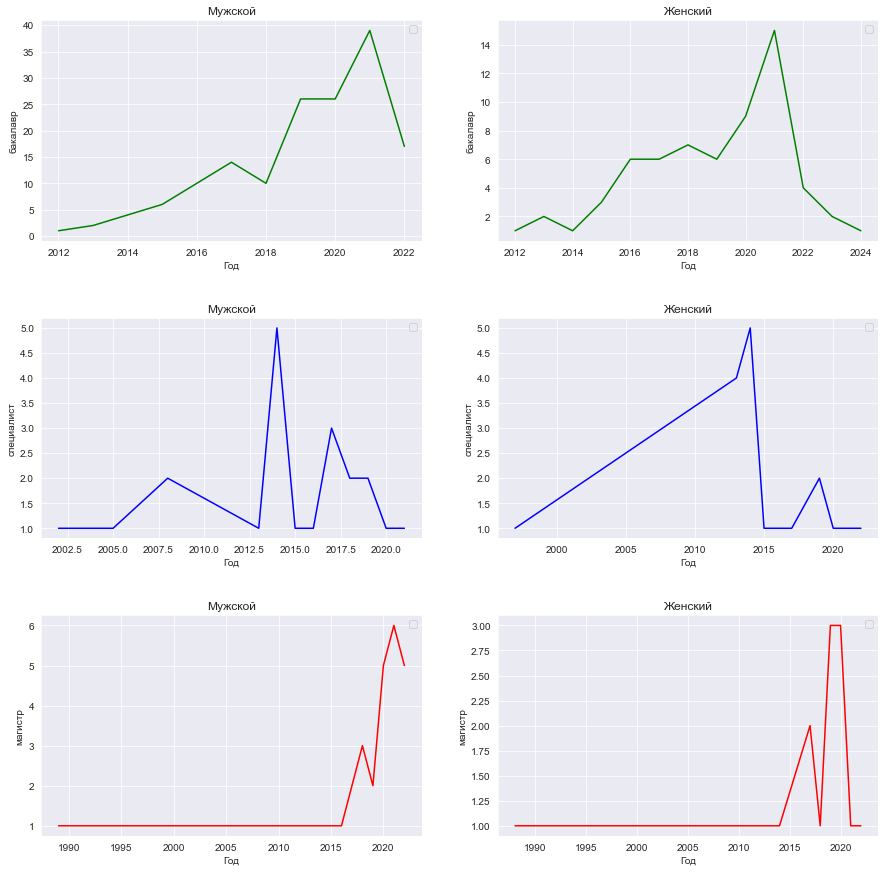

In [41]:
education_status_list = ['бакалавр', 'специалист', 'магистр']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
education_status_list = ['бакалавр', 'специалист', 'магистр']
genders = ['Мужской', 'Женский']

colors = ['green', 'blue', 'red', 'orange', 'violet', 'm']

for i, name in enumerate(education_status_list):
    for j, gender in enumerate(genders):
        data = df_graduate.loc[(df_graduate['sex'] == gender) &(df_graduate['education_status'] == name)] \
                      .groupby(['graduation'], as_index=False) \
                      .agg({'education_status' : 'count'}) 
        ax = axs[i][j]
        sns.lineplot(x='graduation', y = 'education_status', data = data, ax=ax, color=colors[i]) 
        fig.subplots_adjust(hspace=0.35)
        ax.legend()
        ax.set_xlabel('Год')
        ax.set_ylabel(education_status_list[i])
        ax.set_title(genders[j])
        ax.legend()

### Проверка интересов

In [178]:
data_in = df.copy()
data_in = df_word[df_word['interests'] != 0].reset_index()
data_in = df_word[['interests']]

In [179]:
data_in

,interests
0,"Математика, программирование, виниловые пласти..."
1,"Литература, мода, биоинформатика"
2,"Аниме, фантастика, фэнтези, фильмы, парусный с..."
3,"лютости, девушки, программирование"
4,Диссертация
5,Еда
6,"Музыка, ничегонеделание :)"
7,"Glam Metal, Hard Rock, 80's, гитара, тату, дли..."
8,"Математика, техника. Могу разобрать любой приб..."
9,Обожаю читать и играть на фортепиано) гулять с...


### Предобработка текста


In [180]:
from nltk.tokenize import word_tokenize        # Импорт токенезации слов
from nltk import download as nltk_download     # Паке с токенизатором

nltk_download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [201]:
!wget https://raw.githubusercontent.com/dhhse/dh2020/master/data/stop_ru.txt
with open ("stop_ru.txt", "r") as stop_ru:
    rus_stops = [word.strip() for word in stop_ru.readlines()]
punctuation = '!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~—»«...–'    
filter = rus_stops + list (punctuation)

--2022-07-29 12:35:43--  https://raw.githubusercontent.com/dhhse/dh2020/master/data/stop_ru.txt
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 5823 (5,7K) [text/plain]
Сохранение в: «stop_ru.txt.2»

     0K .....                                                 100% 3,20M=0,002s

2022-07-29 12:35:44 (3,20 MB/s) - «stop_ru.txt.2» сохранён [5823/5823]



In [202]:
# Установка лематизатора
import re
from pymorphy2 import MorphAnalyzer
parser = MorphAnalyzer()

## Функция предообработки текста
1. Приводим текст к нижнему регистру;
2. Токенизируем его;
3. Выбрасываем слова, которые входят в наш список, объединяющий знаки препинания и стоп-слова;
4. Очищенный токенизированный текст мы лемматизируем — это как раз то, что нужно для тематического моделирования.

In [203]:
def preprocess(input_text):
    """
    Функция для предобработки текста. Слова приводятся к нижнему регистру,
    стоп-слова удаляются, далее слова лемматизируются
    :param input_text: Входной текст для очистки и лемматизации
    :return: Очищенный и лемматизированный текст
    """
   
    text = input_text.lower()
    text = re.sub("^\s+|\n|\r|\s+$", ' ', text)
    tokenized_text = word_tokenize(text)
    clean_text = [word for word in tokenized_text if word not in filter]
    lemmatized_text = [parser.parse(word)[0].normal_form for word in 
                       clean_text]
    
    return lemmatized_text

In [204]:
data_in['interests'] = data_in['interests'].astype(str)

In [205]:
data_in["text_processed"] = data_in['interests'].map(preprocess)
data_in["text_processed"]

0     [математик, программирование, виниловый, пласт...
1                    [литература, мода, биоинформатика]
2     [аниме, фантастика, фэнтези, фильм, парусный, ...
3                  [лютость, девушка, программирование]
4                                         [диссертация]
5                                                 [еда]
6                             [музыка, ничегонеделание]
7     [glam, metal, hard, rock, 80, 's, гитара, тат,...
8     [математик, техника, мочь, разобрать, любой, п...
9     [обожать, читать, и, играть, на, фортепиано, г...
10                                            [человек]
11          [путешествие, поход, спорт, лошадь, собака]
12    [фриланс, музыка, литература, спорт, предприни...
13                         [--, --, --, --, --, --, --]
14    [рисование, япония, манга, фотография, монтаж,...
15                                       [спорт, marks]
16                        [друг, здоровье, информатика]
17    [машинный, обучение, компьютерный, зрение,

### Тематическое моделирование

In [206]:
import gensim
 
gensim_dictionary = gensim.corpora.Dictionary(data_in["text_processed"])
#gensim_dictionary1.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary.compactify()

### Создадим корпус в виде мешка слов

In [264]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in data_in['text_processed']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Тематическое моделирование

In [278]:
# 11 Топиков 
lda_11 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=11, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [279]:
# метрика c_v (5 топиков)
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_11,
                                     texts=data_in["text_processed"],
                                     dictionary=gensim_dictionary,
                                     coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
 
print("\nCoherence Score: ", coherence_lda)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5934163102901481


In [259]:
def coherence_score(dictionary, corpus, texts, max, start=2, step=1,
                    measure="c_v"):
    """
    Функция вычисляет метрики для оценки тем. моделирования и выводит 
    график, где по оси x отложено количество топиков, а по оси y — значение 
    метрики
    :param dictionary: словарь для тематического моделирования
    :param corpus: корпус в виде мешка слов
    :param texts: тексты документов
    :param max: максимальное количество топиков
    :param start: стартовое количество топиков
    :param step: промежуток, с которым вычисляются топики
    :param measure: метрика
    """
    coherence_values = []
    for num_topics in range(start, max, step):
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, 
                                           passes=10, num_topics=num_topics, 
                                           random_state=6457)
        coherencemodel = CoherenceModel(model=model, texts=texts, 
                                        dictionary=dictionary, 
                                        coherence=measure)
        coherence_values.append(coherencemodel.get_coherence())
    x = range(start, max, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel(measure + "score")
    plt.legend(("coherence_score"), loc='best')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


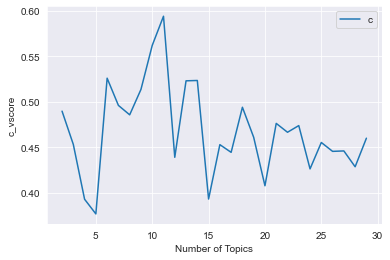

In [260]:
import matplotlib.pyplot as plt
 
coherence_score(dictionary=gensim_dictionary, corpus=corpus, texts=data_in["text_processed"], start=2, max=30, step=1, measure="c_v")

In [280]:
# LDA 11 топиков 
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
vis_11 = gensimvis.prepare(lda_11, corpus, gensim_dictionary)
pyLDAvis.enable_notebook()
vis_11

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.004384 -0.182254       1        1  18.189351
8      0.067480 -0.008451       2        1  13.319556
6     -0.059056 -0.018983       3        1  11.396526
2     -0.160921  0.099568       4        1  10.971798
7      0.043468  0.084553       5        1  10.694542
1      0.123042  0.079578       6        1  10.446975
0      0.084296  0.005445       7        1   7.632385
3     -0.044472  0.018633       8        1   6.364805
10    -0.023783 -0.052011       9        1   5.463064
5     -0.014076 -0.014623      10        1   2.809250
9     -0.011593 -0.011455      11        1   2.711748, topic_info=                 Term      Freq     Total Category  logprob  loglift
92                 --  5.000000  5.000000  Default  30.0000  30.0000
5    программирование  5.000000  5.000000  Default  29.0000  29.0000
20             музыка  6.000000  6.000000  Default  28.0000  28.0000
38                  и  6.000000  6.000000  Default  27.0000  27.0000
0               аниме  3.000000  3.000000  Default  26.0000  26.0000
..                ...       ...       ...      ...      ...      ...
34             гитара  0.029154  2.478986  Topic11  -5.6802  -0.8354
71               друг  0.029154  1.507385  Topic11  -5.6802  -0.3380
101             marks  0.029154  1.197038  Topic11  -5.6802  -0.1074
119         рукоделие  0.029154  1.654271  Topic11  -5.6802  -0.4310
137              игра  0.029154  3.061587  Topic11  -5.6802  -1.0465

[455 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
22        4  0.841065             's
92        4  0.988715             --
204       3  0.859641              1
23        4  0.841059             80
168       3  0.859641             ai
...     ...       ...            ...
47        4  0.841063         чёрный
117       3  0.561937        шахматы
117       5  0.561937        шахматы
164       2  0.835393  экстраполяция
100       1  0.796890         япония

[238 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 7, 3, 8, 2, 1, 4, 11, 6, 10])